<a href="https://colab.research.google.com/github/monindew/study/blob/main/20250318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart = pd.read_csv("heart.csv")

In [ ]:
list(heart.columns)

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'HeartDisease']

In [ ]:
heart.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,HeartDisease
0,40,M,ATA,140.0,289,NaN,Normal,172,N,0.0
1,49,F,NAP,160.0,180,NaN,Normal,156,N,NaN
2,37,M,ATA,NaN,283,NaN,ST,98,N,NaN


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       891 non-null    float64
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       827 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   HeartDisease    916 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 71.8+ KB


In [ ]:
for i in heart.columns:
  missingValueRate = heart[i].isna().sum() / len(heart) * 100
  if missingValueRate > 0:
    print("{0} null rate: {1}%".format(i, round(missingValueRate, 2)))


RestingBP null rate: 2.94%
FastingBS null rate: 9.91%
HeartDisease null rate: 0.22%


In [ ]:
heart["FastingBS"] = heart["FastingBS"].fillna(0)

In [ ]:
heart["RestingBP"] = heart["RestingBP"].replace(np.nan, heart["RestingBP"].median())

In [ ]:
heart.dropna(axis=0, inplace=True)

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 916 entries, 0 to 917
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             916 non-null    int64  
 1   Sex             916 non-null    object 
 2   ChestPainType   916 non-null    object 
 3   RestingBP       916 non-null    float64
 4   Cholesterol     916 non-null    int64  
 5   FastingBS       916 non-null    float64
 6   RestingECG      916 non-null    object 
 7   MaxHR           916 non-null    int64  
 8   ExerciseAngina  916 non-null    object 
 9   HeartDisease    916 non-null    float64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.7+ KB


In [ ]:
print(heart["MaxHR"].mean())
print(heart["MaxHR"].median())

136.83078602620088
138.0


In [ ]:
heart["ChestPainType"].value_counts()

,count
ChestPainType,
ASY,496
NAP,202
ATA,172
TA,46


In [ ]:
heart[["Age", "MaxHR", "Cholesterol"]].describe()

,Age,MaxHR,Cholesterol
count,916.000000,916.000000,916.000000
mean,53.533843,136.830786,198.728166
std,9.425923,25.447917,109.466452
min,28.000000,60.000000,0.000000
25%,47.000000,120.000000,173.000000
50%,54.000000,138.000000,223.000000
75%,60.000000,156.000000,267.000000
max,77.000000,202.000000,603.000000


In [ ]:
heart.groupby(["HeartDisease", "ChestPainType"])[["Age", "MaxHR", "Cholesterol"]].mean()

Age       MaxHR  Cholesterol
HeartDisease ChestPainType                                    
0.0          ASY            52.317308  138.548077   226.865385
             ATA            48.236486  152.621622   232.668919
             NAP            51.045802  150.641221   221.503817
             TA             54.692308  150.500000   222.730769
1.0          ASY            55.660714  125.806122   175.974490
             ATA            55.958333  137.500000   233.291667
             NAP            57.549296  129.394366   153.281690
             TA             55.000000  144.500000   186.700000

In [ ]:
heart.groupby('Sex')["RestingBP"].mean()

,RestingBP
Sex,
F,132.119792
M,132.421271


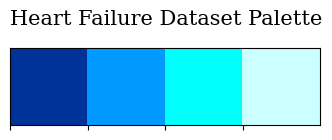

In [ ]:
sns.palplot(["#003399", "#0099FF", "#00FFFF", "#CCFFFF"])
plt.title("Heart Failure Dataset Palette", loc="left", fontfamily="serif", fontsize=15, y=1.2)
plt.show()

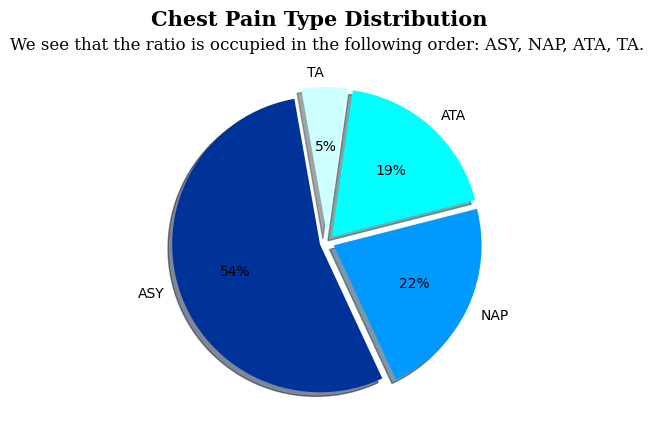

In [ ]:
ratio = heart["ChestPainType"].value_counts()
plt.pie(x=ratio, labels=ratio.index, autopct="%0.f%%", startangle=100, explode=[0.05, 0.05, 0.05, 0.05], shadow=True, colors=["#003399", "#0099FF", "#00FFFF", "#CCFFFF"])
plt.suptitle("Chest Pain Type Distribution", fontfamily="serif", fontsize=15, fontweight="bold")
plt.title("We see that the ratio is occupied in the following order: ASY, NAP, ATA, TA.", fontfamily="serif", fontsize=12)
plt.show()

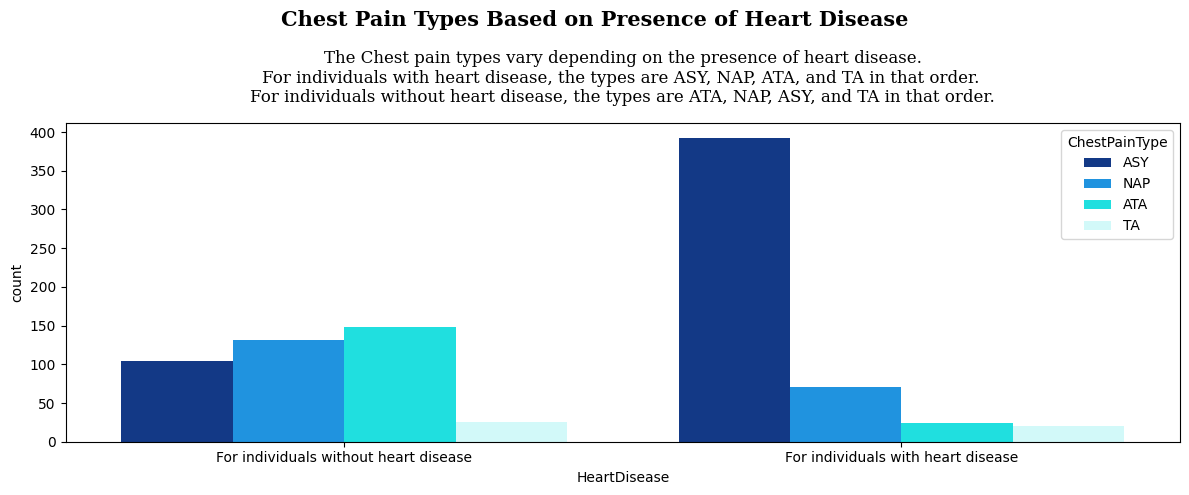

In [ ]:
plt.figure(figsize=(12, 5))

sns.countplot(data=heart, x="HeartDisease", hue="ChestPainType",
              hue_order=["ASY", "NAP", "ATA", "TA"],
              palette=["#003399", "#0099FF", "#00FFFF", "#CCFFFF"])
plt.suptitle("Chest Pain Types Based on Presence of Heart Disease",
             fontfamily="serif", fontsize=15, fontweight="bold")
plt.title("The Chest pain types vary depending on the presence of heart disease.\nFor individuals with heart disease, the types are ASY, NAP, ATA, and TA in that order. \nFor individuals without heart disease, the types are ATA, NAP, ASY, and TA in that order.",
          fontfamily="serif", fontsize=12, pad=15)
plt.xticks([0, 1], ["For individuals without heart disease", "For individuals with heart disease"])
plt.tight_layout()
plt.show()

In [ ]:
Heart_Age = heart.groupby("Age")["HeartDisease"].value_counts().unstack(level="HeartDisease")

In [ ]:
Heart_Age.head()

HeartDisease,0.0,1.0
Age,,
28,1.0,NaN
29,3.0,NaN
30,1.0,NaN
31,1.0,1.0
32,3.0,2.0


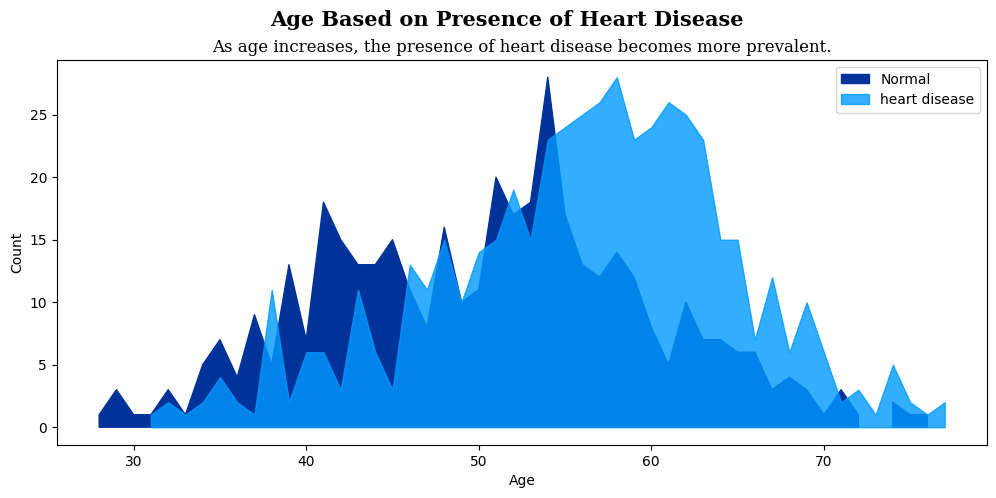

In [ ]:
plt.figure(figsize=(12, 5))
plt.fill_between(x=Heart_Age[0].index, y1=0, y2=Heart_Age[0],
                 color="#003399", alpha=1, label="Normal")
plt.fill_between(x=Heart_Age[1].index, y1=0, y2=Heart_Age[1],
                 color="#0099FF", alpha=0.8, label="heart disease")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")
plt.suptitle("Age Based on Presence of Heart Disease", fontfamily="serif",
             fontsize=15, fontweight="bold")
plt.title("As age increases, the presence of heart disease becomes more prevalent.", fontfamily='serif', fontsize=12)
plt.show()